<a href="https://colab.research.google.com/github/hannape/Gruba-kreska/blob/main/Main_wczytanie_reprezentacje2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Wczytywanie google drive'a
from google.colab import drive
drive.mount('/content/drive')
from __future__ import print_function

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
## CONFIGI

# 1. wczytanie configów jako .py
! cp "drive/My Drive/Colab Notebooks/config.py" .
from config import * 

# 2. alternatywnie, jako .ini, część parametrów tylko zrobiłam. Jak uznasz że to sensowne/"tak trzeba", zrobię resztę. 
''' Tak wygląda ten fragment parametrów. Jednak potem by to sensownie wczytać, potrzebne będzie sporo linijek. Ma to sens? 
w configu mam obecnie 32-34 zmienne, w różnych formatach.
zaratość pliku  config_json.ini:

[proba]
path_txt = drive/My Drive/poprawione etykiety 24112020/testowe/
balance_typ = ["full_rec","balanced", "valid" ] 
balance_rat = [None, [50, 25], [400, 100]] 
chunk_length = 500 
summ = [1,1,1,1]
wind = hann  
'''
import ast
import os
import json
from configparser import ConfigParser

path_main = 'drive/My Drive/Colab Notebooks/'

config2 = ConfigParser()
config2.read(os.path.join(path_main+'config_json.ini'))
#for key in config2['proba']:  
#  print(key)
path_test1618_txt = config2.get("proba","path_txt")
balance_types = json.loads(config2.get("proba","balance_typ"))
balance_rations = ast.literal_eval( config2.get("proba","balance_rat"))
chunk_length_ms = int(config2.get("proba","chunk_length"))
summary_1d = ast.literal_eval(config2.get("proba","summ"))
window = config2.get("proba","wind")



In [3]:
# Wczytanie funkcja_wczytanie_danych.py z dysku

! cp "drive/My Drive/Colab Notebooks/funkcja_wczytanie_danych.py" .
from funkcja_wczytanie_danych import *

In [4]:
import time
start_time = time.time()

data_train, data_valid, data_test_old, data_test_new, = funkcja_wczytanie_danych(path_test1618_txt, path_train161718_txt, path_test1618_wav,\
                                                                                 path_train161718_wav, balance_types, balance_ratios, chunk_length_ms,\
                                                                                 chunk_overlap, calls_0, calls_1, calls_unknown, tolerance, valid_set,\
                                                                                 test_rec_to_cut, columns_dataframe)
print("--- Funkcja wczytanie danych: %s sekund ---" % (time.time() - start_time))

*************  Train  ***********
------------Analiza nagrania: 1swierszcze_nakladki_BUK4_20160925_204604.wav-----------
------------Analiza nagrania: 2koniec_swierszczy_BUK4_20160925_221604.wav-----------
------------Analiza nagrania: 3wzgledna_cisza_BUK4_20160925_224604.wav-----------
------------Analiza nagrania: 4szum_sredni_BUK4_20160918_013604.wav-----------
------------Analiza nagrania: 5szum_sredni_nakladki_BUK4_20161011_000804.wav-----------
------------Analiza nagrania: 6wichura_deszcz_BUK4_20161005_022304.wav-----------
------------Analiza nagrania: 7wiatr_BUK4_20161006_002104.wav-----------
------------Analiza nagrania: 8deszczk_bezptasio_BUK4_20161015_235704.wav-----------
------------Analiza nagrania: BUK4_20160918_223304.wav-----------
------------Analiza nagrania: BUK4_20160919_013304.wav-----------
------------Analiza nagrania: BUK4_20160925_191604.wav-----------
------------Analiza nagrania: BUK4_20160925_194604.wav-----------
------------Analiza nagrania: BUK4_201609

In [ ]:
!pip install pkgconfig==1.5.1 
!pip install Cython==0.29.21
!pip install libtfr==2.0.2

In [6]:
! cp "drive/My Drive/Colab Notebooks/funkcja_reprezentacje.py" .
from funkcja_reprezentacje import *

In [12]:
import numpy as np
import time

start_time = time.time()
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
file_names, indices, info_chunksy, representation_type, repr_full = funkcja_reprezentacje(path_train161718_wav, data_valid, 'spektrogram', repr_1d_summary, summary_1d, sr, chunk_length_ms, \
                          n_fft, win_length, hop_length, window, f_min, f_max, n_mels, N, step, Np, K, tm, flock, tlock)

print("--- Funkcja reprezentacja danych: %s sekund dla %s ---" % (time.time() - start_time, representation_type))

['9niski_szum_BUK4_20161025_000604.wav', 'BUK1_20160914_011604.wav', 'BUK4_20161013_200104.wav', 'BUK4_20161024_223604.wav', 'BUK4_20171001_020404a.wav', 'BUK5_20170910_025605.wav', 'BUK5_20180930_000704.wav', 'BUK5_20181003_235705.wav']
0 - 9niski_szum_BUK4_20161025_000604.wav - chunks: 446 - time: 18.39274024963379
1 - BUK1_20160914_011604.wav - chunks: 445 - time: 20.293286323547363
2 - BUK4_20161013_200104.wav - chunks: 215 - time: 18.355265140533447
3 - BUK4_20161024_223604.wav - chunks: 144 - time: 12.53639841079712
4 - BUK4_20171001_020404a.wav - chunks: 447 - time: 28.735177993774414
5 - BUK5_20170910_025605.wav - chunks: 123 - time: 10.118995666503906
6 - BUK5_20180930_000704.wav - chunks: 183 - time: 14.596036672592163
7 - BUK5_20181003_235705.wav - chunks: 129 - time: 11.438041687011719
--- Funkcja reprezentacja danych: 134.5364167690277 sekund dla spektrogram ---


In [ ]:
# transformacja całego wyjścia na ogromnego datafrejma - TO DO


# Jak już będzie datafrejm, to wziąć odpowiednią kolumnę i wyznaczyć parametry normalizacyjne  dla wszystkich chunksów
# https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

ile nagrań w secie:  8
Dla przykładowego nagrania, które jest 5 w secie:
BUK5_20170910_025605.wav
liczba wybranych chunków: 123 , w tym 3 z głosami, 20 z trzaskami , reszta to losowo wybrane chunksy negatywne (bez ptaków)
rodzaj reprezentacji: spektrogram
rozmiar macierzy z reprezentacją: (123, 63, 148)
etykiety do wszystkich chunksów: [list(['t']) list(['t']) list(['t']) list([]) list([]) list([]) list([])
 list([]) list([]) list([]) list([]) list([]) list([]) list(['t'])
 list(['t']) list([]) list(['t']) list([]) list([]) list([]) list([])
 list(['t']) list([]) list([]) list(['s']) list(['t']) list([]) list([])
 list([]) list([]) list([]) list([]) list([]) list(['t']) list([])
 list([]) list([]) list([]) list([]) list([]) list([]) list([]) list([])
 list([]) list(['t']) list(['t']) list([]) list([]) list([]) list([])
 list([]) list([]) list([]) list([]) list([]) list([]) list([]) list([])
 list([]) list([]) list([]) list([]) list([]) list([]) list([]) list([])
 list([]) list([]) list

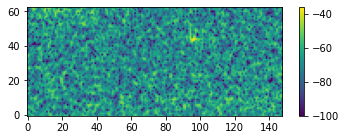

[[ -63.509773  -68.32877   -55.94778  ...  -58.730576  -64.46391
   -74.709206]
 [ -64.75696   -56.700928  -64.47288  ...  -89.69101   -61.555428
   -68.26148 ]
 [ -55.60121   -59.752655  -92.6109   ...  -70.650734  -60.68941
   -88.46248 ]
 ...
 [-100.        -76.01068   -75.22315  ...  -57.693333  -65.296425
   -76.11144 ]
 [ -89.144585  -77.54021   -66.01547  ...  -58.869392  -57.727734
   -73.0243  ]
 [ -86.38422   -73.932846  -54.46221  ...  -68.559654  -63.786587
   -76.07754 ]]


In [16]:
import matplotlib.pyplot as plt

print('ile nagrań w secie: ', len(file_names))
nagr = 5
chunks = 24
print('Dla przykładowego nagrania, które jest', nagr, 'w secie:' )
print(file_names[nagr])
print('liczba wybranych chunków:', np.shape(indices[nagr])[0], ', w tym', sum(info_chunksy[nagr][3]),'z głosami,', sum(info_chunksy[nagr][7]), 'z trzaskami', ', reszta to losowo wybrane chunksy negatywne (bez ptaków)')
print('rodzaj reprezentacji:', representation_type)
print('rozmiar macierzy z reprezentacją:',np.shape(repr_full[nagr]))
print('etykiety do wszystkich chunksów:',info_chunksy[nagr][4]) 
print('Czy chunks nr', chunks,'has_bird? ',info_chunksy[nagr][3][chunks])
if (info_chunksy[nagr][3][chunks]):
  print('występujący tu gatunek: ',info_chunksy[nagr][4][chunks])
plt.figure(figsize=(6,2))
plt.imshow(np.array(repr_full[nagr][chunks]))
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

print(np.array(repr_full[nagr][chunks]))